In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
mylist= os.listdir('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data')
type(mylist)

list

In [3]:
len(mylist)

2932

In [4]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='03':
        feeling_list.append('happy')
    elif item[6:-16]=='04':
        feeling_list.append('sad')
    elif item[6:-16]=='05':
        feeling_list.append('angry')
    elif item[6:-16]=='06':
        feeling_list.append('fearful')
    elif item[6:-16]=='07':
        feeling_list.append('disgust')
    elif item[6:-16]=='08':
        feeling_list.append('surprised')
    elif item[6:-16]=='01':
        feeling_list.append('neutral')
    elif item[:1]=='a':
        feeling_list.append('angry')
    elif item[:1]=='f':
        feeling_list.append('fearful')
    elif item[:1]=='h':
        feeling_list.append('happy')
    elif item[:1]=='n':
        feeling_list.append('neutral')
    elif item[:1]=='d':
        feeling_list.append('disgust')
    elif item[:2]=='su':
        feeling_list.append('surprised')
    elif item[:2]=='sa':
        feeling_list.append('sad')

In [5]:
labels = pd.DataFrame(feeling_list)
labels = labels.rename(columns={0: 'label'})
len(labels)

2556

In [6]:
import seaborn as sns
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

fearful      436
happy        436
angry        436
sad          436
neutral      308
surprised    252
disgust      252
Name: label, dtype: int64


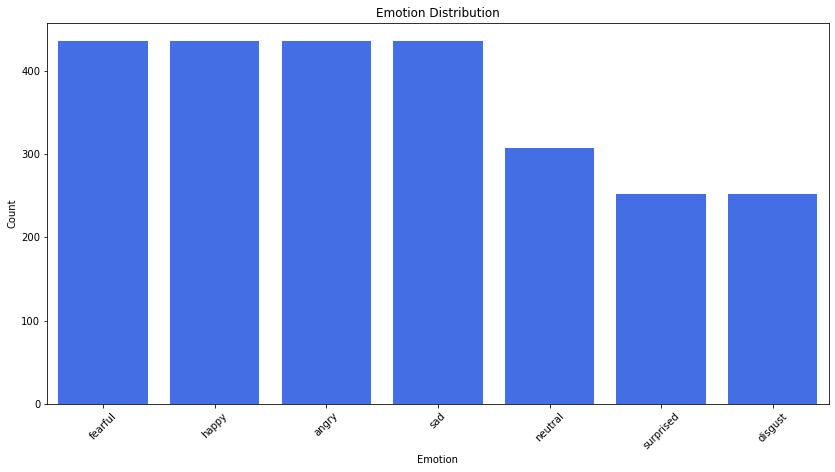

In [7]:
plot = labels.label.value_counts()
print(plot)
plot_emotion_dist(plot, "#2962FF", "Emotion Distribution")

In [8]:
#Prepare the dict
my_dict = {}
i=0
for i in range(216):
    my_dict[i] = []

In [9]:
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='02':
        X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
        for i in range(len(mfccs)):
            my_dict[i].append(mfccs[i])

In [10]:
df = pd.DataFrame.from_dict(my_dict, orient='index').T

In [11]:
xd = df
for i in range(len(df)):
    for j in range(216):
        if xd.iloc[i,j] is None:
            xd.iloc[i,j] = np.zeros(12)

In [77]:
newdf = pd.concat([xd,labels], axis=1)
newdf[:5]

(2556, 217)

In [13]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
2163,"[-499.82315, 53.3069, 43.535885, 31.279427, 20...","[-501.75928, 51.14383, 42.66538, 31.469696, 20...","[-504.63867, 47.44976, 39.90355, 29.721191, 19...","[-500.47977, 52.756966, 43.620506, 31.212143, ...","[-499.8822, 53.54963, 44.36434, 32.129646, 20....","[-502.42056, 49.942085, 40.79904, 28.878315, 1...","[-504.15915, 47.97694, 40.00379, 29.190634, 18...","[-505.74518, 45.99244, 38.734512, 28.915, 18.8...","[-506.34537, 44.948677, 37.16808, 26.69284, 16...","[-504.6684, 47.3078, 39.541374, 29.220196, 19....",...,"[-623.2378, 184.96655, 114.3223, 59.51402, 22....","[-632.716, 178.38919, 116.32378, 58.50492, 16....","[-641.71783, 170.5233, 116.20296, 60.630745, 1...","[-641.1941, 172.79413, 119.87223, 62.094387, 1...","[-644.7837, 167.84998, 115.06439, 57.100384, 1...","[-652.9924, 158.4725, 109.90269, 54.9793, 13.1...","[-588.1392, 184.50223, 54.482674, 5.862859, 22...","[-547.2226, 217.75565, 55.391396, 3.3837395, 1...","[-483.81613, 239.0766, 37.12005, 16.722008, 6....",disgust
2377,"[-533.5735, 45.12412, 39.95872, 32.761047, 24....","[-532.046, 47.350304, 42.301353, 35.08718, 26....","[-532.4584, 46.614418, 41.30359, 34.15579, 26....","[-528.86316, 50.96923, 43.836174, 34.663902, 2...","[-530.4737, 48.80708, 41.87343, 32.696644, 23....","[-518.1882, 62.94487, 48.100533, 30.55724, 16....","[-331.01373, 191.8111, -12.488295, -29.928204,...","[-232.56204, 242.68521, -59.52974, -45.40988, ...","[-197.44121, 251.33063, -77.190704, -34.068615...","[-180.63985, 245.97372, -82.51715, -16.060709,...",...,"[-437.8632, 180.92929, 77.94978, 21.898811, 8....","[-441.1194, 163.68512, 94.93126, 50.808243, 32...","[-396.31573, 63.82667, -32.11351, 76.15352, 21...","[-511.38303, 64.70065, 35.900436, 10.823419, 2...","[-399.0953, 181.56587, 5.940622, 20.533392, 56...","[-401.62555, 192.0582, 27.103535, 34.757843, 6...","[-352.5397, 194.41306, 15.169859, 36.925163, 7...","[-526.756, 63.80228, 2.0526721, 61.37844, 5.93...","[-347.54974, 236.92787, 32.924717, 7.938621, 1...",neutral
1838,"[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-673.0463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-647.29584, -30.761276, 16.689568, -0.7552659...","[-625.6985, -51.6166, 19.443789, 8.7887535, -1...","[-629.6596, -15.751991, 17.262547, 13.610334, ...",...,"[-327.79108, 17.625046, -46.3371, 63.0961, 2.0...","[-265.22916, -6.6743593, -41.26962, 75.142204,...","[-263.85147, 2.6184912, -29.557281, 77.11604, ...","[-273.60388, 54.708458, -49.94862, 47.946396, ...","[-316.3395, 101.54003, -66.20595, 31.761997, -...","[-342.5454, 105.81831, -58.03195, 17.89098, -1...","[-219.30804, 173.67752, -26.01684, -15.515549,...","[-208.42949, 183.82672, -21.697224, 3.3792627,...","[-181.94077, 189.50677, -20.458355, 15.304192,...",angry
905,"[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-691.6485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[-448.0172, 212.82202, 19.627798, -65.1997, -4...","[-476.80542, 198.09756, 29.493046, -60.02099, ...","[-497.61688, 189.40172, 35.038597, -56.470364,...","[-507.58112, 183.06668, 35.215614, -56.408264,...","[-512.69495, 180.25961, 40.307236, -51.53562, ...","[-521.949, 173.52545, 43.94757, -44.875526, -4...","[-522.73315, 156.67891, 26.470253, -39.01335, ...","[-512.35126, 141.07538, 1.8

In [14]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
len(train)

2034

In [15]:
train_features = train.iloc[:,:-1]
train_labels = train.iloc[:, -1:]
test_features = test.iloc[:,:-1]
test_labels = test.iloc[:, -1:]

In [16]:
#Reshaping train and test into 4d array
X_train = np.array(train_features)
X_train_cnn = np.zeros((len(X_train),216,12))
for i in range(len(X_train)):
    for j in range(216):
        for k in range(12):
            X_train_cnn[i,j,k] = X_train[i][j][k]
            
X_train_cnn = X_train_cnn.reshape(len(train_features),216,12,1)            
X_train_cnn.shape

(2034, 216, 12, 1)

In [17]:
#Normalize X train
Max = np.amax(X_train_cnn)
Min = np.amin(X_train_cnn)
X_train_cnn = (X_train_cnn - Min) / (Max-Min)
X_train_cnn

array([[[[0.4020883 ],
         [0.82117385],
         [0.81743314],
         ...,
         [0.78749864],
         [0.78654063],
         [0.78693063]],

        [[0.40319447],
         [0.82278603],
         [0.81912964],
         ...,
         [0.7881777 ],
         [0.78770491],
         [0.7885066 ]],

        [[0.40289585],
         [0.82225311],
         [0.81840707],
         ...,
         [0.79153906],
         [0.7908474 ],
         [0.79135844]],

        ...,

        [[0.5331907 ],
         [0.92928703],
         [0.79948135],
         ...,
         [0.79203757],
         [0.77852522],
         [0.7937648 ]],

        [[0.40702545],
         [0.83470034],
         [0.78998205],
         ...,
         [0.80966377],
         [0.79573023],
         [0.78544132]],

        [[0.53680436],
         [0.96007573],
         [0.8123392 ],
         ...,
         [0.77663836],
         [0.77751248],
         [0.78911394]]],


       [[[0.30108381],
         [0.78849553],
         [0.78

In [349]:
X_test = np.array(test_features)
X_test_cnn = np.zeros((len(X_test),216,12))
for i in range(len(X_test)):
    for j in range(216):
        for k in range(12):
            X_test_cnn[i,j,k] = X_test[i][j][k]
X_test_cnn = X_test_cnn.reshape(len(test_features),216,12,1)
X_test_cnn.shape

(522, 216, 12, 1)

In [350]:
#Normalize X test
Max = np.amax(X_test_cnn)
Min = np.amin(X_test_cnn)
X_test_cnn = (X_test_cnn - Min) / (Max-Min)

In [20]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [21]:
#Label encoding the labels
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

c:\users\kalelt'has\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
#Initializing the model
model = Sequential()

model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=(216, 12 ,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())

model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 216, 12, 20)       520       
_________________________________________________________________
activation (Activation)      (None, 216, 12, 20)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 6, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12960)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              12961000  
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
cnnhistory = model.fit(X_train_cnn, y_train, batch_size=20, epochs=105, verbose=1, validation_split=0.2)

Epoch 1/105
82/82 [==============================] - 10s 119ms/step - loss: 0.4685 - accuracy: 0.1684 - val_loss: 0.4083 - val_accuracy: 0.1671
Epoch 2/105
82/82 [==============================] - 9s 114ms/step - loss: 0.4047 - accuracy: 0.1856 - val_loss: 0.4012 - val_accuracy: 0.2629
Epoch 3/105
82/82 [==============================] - 9s 112ms/step - loss: 0.3936 - accuracy: 0.2526 - val_loss: 0.3903 - val_accuracy: 0.2408
Epoch 4/105
82/82 [==============================] - 9s 112ms/step - loss: 0.3809 - accuracy: 0.2747 - val_loss: 0.3740 - val_accuracy: 0.2703
Epoch 5/105
82/82 [==============================] - 10s 117ms/step - loss: 0.3777 - accuracy: 0.2895 - val_loss: 0.3688 - val_accuracy: 0.3292
Epoch 6/105
82/82 [==============================] - 9s 109ms/step - loss: 0.3701 - accuracy: 0.3098 - val_loss: 0.3687 - val_accuracy: 0.3022
Epoch 7/105
82/82 [==============================] - 9s 109ms/step - loss: 0.3666 - accuracy: 0.3344 - val_loss: 0.3652 - val_accuracy: 0.35

Epoch 58/105
82/82 [==============================] - 9s 112ms/step - loss: 0.1869 - accuracy: 0.7277 - val_loss: 0.3079 - val_accuracy: 0.5258
Epoch 59/105
82/82 [==============================] - 9s 113ms/step - loss: 0.1852 - accuracy: 0.7136 - val_loss: 0.2991 - val_accuracy: 0.5209
Epoch 60/105
82/82 [==============================] - 10s 120ms/step - loss: 0.1802 - accuracy: 0.7345 - val_loss: 0.2895 - val_accuracy: 0.5184
Epoch 61/105
82/82 [==============================] - 9s 112ms/step - loss: 0.1755 - accuracy: 0.7412 - val_loss: 0.2907 - val_accuracy: 0.5307
Epoch 62/105
82/82 [==============================] - 9s 113ms/step - loss: 0.1739 - accuracy: 0.7425 - val_loss: 0.2996 - val_accuracy: 0.5086
Epoch 63/105
82/82 [==============================] - 10s 117ms/step - loss: 0.1722 - accuracy: 0.7462 - val_loss: 0.2910 - val_accuracy: 0.5307
Epoch 64/105
82/82 [==============================] - 9s 114ms/step - loss: 0.1699 - accuracy: 0.7400 - val_loss: 0.2990 - val_accurac

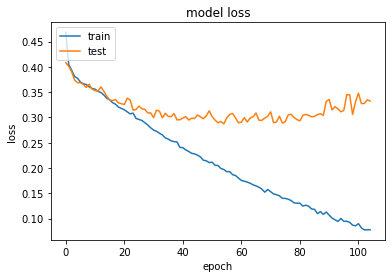

In [25]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
scores = model.evaluate(X_test_cnn, y_test)

17/17 [==============================] - 0s 26ms/step - loss: 0.3364 - accuracy: 0.5805


In [27]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.05%


In [28]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Kalelt'has\Desktop\Stage\ASP\saved_models\Emotion_Voice_Detection_Model.h5 


In [29]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [305]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [351]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_cnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 58.05%


In [353]:
preds = loaded_model.predict(X_test_cnn, 
                         batch_size=32, 
                         verbose=1)
preds1=preds.argmax(axis=1)
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)
finaldf.groupby('actualvalues').count()


17/17 [==============================] - 1s 31ms/step


,predictedvalues
actualvalues,
angry,88
disgust,45
fearful,94
happy,92
neutral,72
sad,77
surprised,54


In [354]:
finaldf.groupby('predictedvalues').count()


,actualvalues
predictedvalues,
angry,97
disgust,45
fearful,86
happy,83
neutral,95
sad,82
surprised,34


In [391]:
data, sampling_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\ASP\saved_voice\\Raw Mark Henry Theme Song.wav')

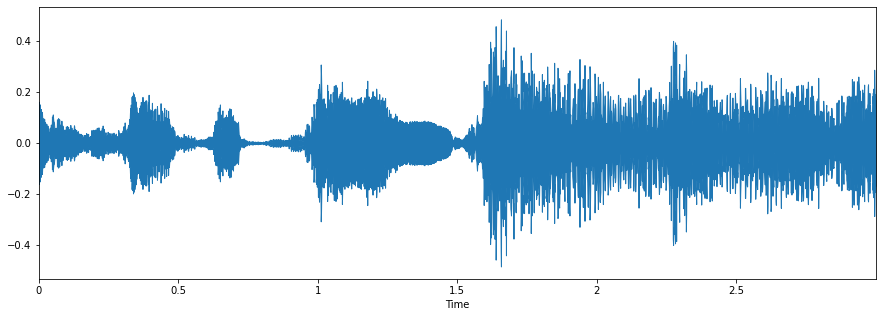

In [392]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [393]:
#Prepare the dict for the recorded sample
my_dict = {}
i=0
for i in range(216):
    my_dict[i] = np.zeros(12)

In [394]:
X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\ASP\saved_voice\\Raw Mark Henry Theme Song.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
for i in range(len(mfccs)):
    my_dict[i] = mfccs[i]

In [395]:
df_record = pd.DataFrame.from_dict(my_dict, orient='index')

In [396]:
X_record = np.array(df_record)
X_record.shape

(216, 12)

In [397]:
# X_record_cnn = np.zeros((1,216,12))
# for i in range(216):
#     for j in range(12):
#         X_record_cnn[0][i][j] = X_record[i,j]

In [398]:
X_record = X_record.reshape(1,216,12,1)

In [399]:
livepreds = loaded_model.predict(X_record, 
                         batch_size=32)

In [400]:
livepreds

array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [401]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions


array(['disgust'], dtype=object)